## In this we have extracted all the features to respective diamond images and we converted extracted features into a single csv file (new_diamonds.csv)

In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d aayushpurswani/diamond-images-dataset
!unzip diamond-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: web_scraped/round/220491-691.jpg  
  inflating: web_scraped/round/220491-697.jpg  
  inflating: web_scraped/round/220491-705.jpg  
  inflating: web_scraped/round/220491-707.jpg  
  inflating: web_scraped/round/220491-86.jpg  
  inflating: web_scraped/round/220492-175.jpg  
  inflating: web_scraped/round/220492-212.jpg  
  inflating: web_scraped/round/220492-82.jpg  
  inflating: web_scraped/round/220493-64.jpg  
  inflating: web_scraped/round/220493-67.jpg  
  inflating: web_scraped/round/220493-75.jpg  
  inflating: web_scraped/round/220494-110.jpg  
  inflating: web_scraped/round/220494-112.jpg  
  inflating: web_scraped/round/220494-132.jpg  
  inflating: web_scraped/round/220494-147.jpg  
  inflating: web_scraped/round/220494-156.jpg  
  inflating: web_scraped/round/220494-185.jpg  
  inflating: web_scraped/round/220494-73.jpg  
  inflating: web_scraped/round/220494-97.jpg  
  inflating: web_scraped/round/220494-99.jpg

In [3]:
import os

# Define the path to the image
image_path = '/content/web_scraped/emerald/220188-630.jpg'

# Check if the file exists before attempting to delete
if os.path.exists(image_path):
    # Delete the file
    os.remove(image_path)
    print(f"File '{image_path}' deleted successfully.")
else:
    print(f"File '{image_path}' does not exist.")

File '/content/web_scraped/emerald/220188-630.jpg' deleted successfully.


In [4]:
import os
import shutil

# Define the path to the folder you want to remove
folder_to_remove = '/content/web_scraped/marquise'

# Check if the folder exists before attempting to remove it
if os.path.exists(folder_to_remove):
    try:
        # Use shutil.rmtree to remove the folder and its contents recursively
        shutil.rmtree(folder_to_remove)
        print(f"Folder '{folder_to_remove}' and its contents have been successfully removed.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Folder '{folder_to_remove}' does not exist.")

Folder '/content/web_scraped/marquise' and its contents have been successfully removed.


In [5]:
import os
import random

# Define the path to the main directory containing the folders
main_directory = '/content/web_scraped/'

# Get a list of folders in the main directory
folders = os.listdir(main_directory)

# Loop through each folder
for folder in folders:
    folder_path = os.path.join(main_directory, folder)

    # Check if the item in the main directory is a folder
    if os.path.isdir(folder_path):
        # Get a list of files in the folder
        files = os.listdir(folder_path)

        # Check if the number of files in the folder is greater than 460
        if len(files) > 3390:
            # Randomly shuffle the files list
            random.shuffle(files)

            # Identify files beyond the first 460 and delete them
            files_to_delete = files[3390:]
            for file_to_delete in files_to_delete:
                file_path = os.path.join(folder_path, file_to_delete)
                os.remove(file_path)
                print(f"Deleted: {file_path}")

Streaming output truncated to the last 5000 lines.
Deleted: /content/web_scraped/round/2130596.jpg
Deleted: /content/web_scraped/round/220708-10.jpg
Deleted: /content/web_scraped/round/2095118.jpg
Deleted: /content/web_scraped/round/2019359.jpg
Deleted: /content/web_scraped/round/220008-85.jpg
Deleted: /content/web_scraped/round/223487-428.jpg
Deleted: /content/web_scraped/round/2128276.jpg
Deleted: /content/web_scraped/round/2089535.jpg
Deleted: /content/web_scraped/round/2108750.jpg
Deleted: /content/web_scraped/round/2114072.jpg
Deleted: /content/web_scraped/round/221227-102.jpg
Deleted: /content/web_scraped/round/222179-210.jpg
Deleted: /content/web_scraped/round/220479-153.jpg
Deleted: /content/web_scraped/round/2092009.jpg
Deleted: /content/web_scraped/round/2132707.jpg
Deleted: /content/web_scraped/round/2107451.jpg
Deleted: /content/web_scraped/round/221127-374.jpg
Deleted: /content/web_scraped/round/221126-58.jpg
Deleted: /content/web_scraped/round/2093141.jpg
Deleted: /conten

In [ ]:
image_path='/content/web_scraped/emerald/1971449.jpg'
image = np.array(Image.open(image_path))
image_tensor = tf.convert_to_tensor(image)

def img_preprocessing(image, label):
    img = tf.io.read_file(image)
    img = tf.io.decode_jpeg(img, channels = 3)
    img = tf.image.resize(img, size = (IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0

    return img, label


def augmentation(image, label):
    img = tf.image.random_flip_left_right(image, seed = SEED)
    img = tf.image.random_flip_up_down(img, seed = SEED)
    img = tf.image.random_brightness(img, 0.1, seed = SEED)
    img = tf.image.random_contrast(img, 0.2, 0.4, seed = SEED)
    img = tf.image.random_saturation(img, 2, 6, seed = SEED)

    return img, label


label='emerald'
image, label = img_preprocessing(image_path,label)
augmented_image, _ = augmentation(image, label)
plt.imshow(tf.cast(augmented_image, tf.uint8))
plt.show()


In [ ]:
def extract_edge_features(path):
    # Convert the image to grayscale
  try:
    I = cv2.imread(path)
    I = cv2.resize(I, (500, 500))
    gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    edge_histogram = np.histogram(edges, bins=8, range=(0, 256))
    # Compute features
    edge_density = np.sum(edges) / (edges.shape[0] * edges.shape[1])
    total_edge_length = np.sum(edges)

    # Display the edge map (optional)
    #cv2_imshow(edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    coeffs = pywt.dwt2(gray, 'haar')

    # Extract features from wavelet coefficients (e.g., mean, variance)
    features = []
    for coef in coeffs:
        features.extend([np.mean(coef), np.var(coef), np.max(coef), np.min(coef)])
    lak=[edge_density, total_edge_length]
    for l in edge_histogram[0]:
      lak.append(l)
      #print('kl:',l)
    for f in features:#wavelets
      lak.append(f)

    return lak
  except Exception as e:
      print(f"Error occurred: {e}")
      return None

# Example usage:
# Load your diamond image
diamond_image = cv2.imread('/content/web_scraped/cushion/111000-7623.jpg')

# Extract edge features for the single image
kk=[]
kk.append(extract_edge_features('/content/web_scraped/cushion/111000-7623.jpg'))
features = extract_edge_features('/content/web_scraped/cushion/111000-7623.jpg')
kk.append(extract_edge_features('/content/web_scraped/cushion/111000-7623.jpg'))

# # Display the extracted features
# print("Extracted Features for Diamond Image:")
# #print("Edge Density:", features[0])
# print("Total Edge Length:", features[1])
# print(features[2])

print(len(kk))
print(kk)
feature_vectors = []
labels = []
dataset_dir='/content/web_scraped'
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    print(class_name)
    print(len(feature_vectors))
    # Iterate through each image in the class directory
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        features = extract_edge_features(image_path)
        if features is not None:
            feature_vectors.append(features)
            labels.append(class_name)

print(labels[13000])
print(df.iloc[13000,'shape'])

In [ ]:
#In this I have extracted all the features to respective diamond images and we converted features into a single csv file (new_diamonds.csv)

In [8]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/new_diamonds.csv')

In [9]:
data.head()

,Unnamed: 0,path_to_img,stock_number,shape,carat,clarity,colour,cut,polish,symmetry,...,New_Column_9,New_Column_10,New_Column_11,New_Column_12,New_Column_13,New_Column_14,New_Column_15,New_Column_16,New_Column_17,New_Column_18
0,0,web_scraped/cushion/2106452.jpg,2106452,cushion,0.55,SI2,N,VG,EX,VG,...,0.0,21192.0,335.389120,6215.681354,510.0,7.0,0.092235,87.381903,135.0,-117.5
1,2,web_scraped/cushion/2055268.jpg,2055268,cushion,0.50,SI1,L,VG,EX,VG,...,0.0,21344.0,348.610552,3632.473990,510.0,11.0,0.012995,91.606232,128.0,-157.0
2,5,web_scraped/cushion/2134348.jpg,2134348,cushion,0.50,SI1,K,FG,EX,VG,...,0.0,20791.0,334.564544,6471.332834,510.0,13.5,0.058411,76.959087,134.5,-117.0
3,7,web_scraped/cushion/2088046.jpg,2088046,cushion,0.50,VS1,M,EX,EX,VG,...,0.0,17572.0,347.195032,4286.452391,510.0,14.0,0.010403,62.512192,124.5,-138.0
4,8,web_scraped/cushion/2136997.jpg,2136997,cushion,0.50,VS1,N,EX,EX,VG,...,0.0,17206.0,342.086496,4281.721742,510.0,28.0,0.064971,63.217088,138.5,-128.5


In [10]:
def create_class(X):
    if X == 'cushion':
        return 0
    elif X =='emerald':
        return 1
    elif X == 'heart':
        return 2
    elif X == 'oval':
        return 3
    elif X == 'pear':
        return 4
    elif X == 'princess':
        return 5
    elif X == 'round':
        return 6
    else:
        print('error class')


# Encoding classes
data['encoded_class'] = data['shape'].apply(create_class)

In [11]:
data.head()

,Unnamed: 0,path_to_img,stock_number,shape,carat,clarity,colour,cut,polish,symmetry,...,New_Column_10,New_Column_11,New_Column_12,New_Column_13,New_Column_14,New_Column_15,New_Column_16,New_Column_17,New_Column_18,encoded_class
0,0,web_scraped/cushion/2106452.jpg,2106452,cushion,0.55,SI2,N,VG,EX,VG,...,21192.0,335.389120,6215.681354,510.0,7.0,0.092235,87.381903,135.0,-117.5,0
1,2,web_scraped/cushion/2055268.jpg,2055268,cushion,0.50,SI1,L,VG,EX,VG,...,21344.0,348.610552,3632.473990,510.0,11.0,0.012995,91.606232,128.0,-157.0,0
2,5,web_scraped/cushion/2134348.jpg,2134348,cushion,0.50,SI1,K,FG,EX,VG,...,20791.0,334.564544,6471.332834,510.0,13.5,0.058411,76.959087,134.5,-117.0,0
3,7,web_scraped/cushion/2088046.jpg,2088046,cushion,0.50,VS1,M,EX,EX,VG,...,17572.0,347.195032,4286.452391,510.0,14.0,0.010403,62.512192,124.5,-138.0,0
4,8,web_scraped/cushion/2136997.jpg,2136997,cushion,0.50,VS1,N,EX,EX,VG,...,17206.0,342.086496,4281.721742,510.0,28.0,0.064971,63.217088,138.5,-128.5,0


In [13]:
y = data['encoded_class'].values
y

array([0, 0, 0, ..., 6, 6, 6])

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
y = data.pop('encoded_class').values
X = data

X_data, X_test, y_data, y_test =  train_test_split(X,y, test_size = 0.1, stratify = y , random_state=42, shuffle=True)
X_train, X_val, y_train, y_val =  train_test_split(X_data, y_data, test_size = 0.1, stratify = y_data, random_state=42, shuffle=True)


print("train shape -> ", X_train.shape[0])
print("val shape -> ", X_val.shape[0])
print("test shape -> ", X_test.shape[0])

train shape ->  18589
val shape ->  2066
test shape ->  2295


In [15]:
!pip install catboost
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.8 MB/s eta 0:00:00


In [30]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm
import pywt
from itertools import chain
from google.colab.patches import cv2_imshow


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score,RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

from catboost import CatBoostClassifier

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model

import seaborn as sns
import shap
shap.initjs()

IMG_SIZE = 100, 100
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE

In [19]:
df=pd.read_csv('/content/drive/MyDrive/new_diamonds.csv')
x=df.iloc[:,4:]
y=df['shape']
x = pd.get_dummies(x, columns=['lab','fluorescence','symmetry','polish','cut',	'colour','clarity'])
le=LabelEncoder()
y=le.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
cat_features = np.where(x.dtypes != float)[0]

model = CatBoostClassifier(one_hot_max_size=12, depth=15,iterations=13,learning_rate=0.01, random_seed=42, use_best_model=True, eval_metric='Accuracy', loss_function='MultiClass')

model.fit(X_train, y_train, cat_features = cat_features, eval_set=(X_test, y_test))
pred = model.predict(X_test)

0:	learn: 0.8012663	test: 0.7677015	best: 0.7677015 (0)	total: 21.5s	remaining: 4m 18s
1:	learn: 0.8287718	test: 0.7965686	best: 0.7965686 (1)	total: 49.8s	remaining: 4m 33s
2:	learn: 0.8523284	test: 0.8314270	best: 0.8314270 (2)	total: 1m 13s	remaining: 4m 5s
3:	learn: 0.8633578	test: 0.8406863	best: 0.8406863 (3)	total: 1m 35s	remaining: 3m 35s
4:	learn: 0.8688725	test: 0.8480392	best: 0.8480392 (4)	total: 1m 59s	remaining: 3m 11s
5:	learn: 0.8742511	test: 0.8485839	best: 0.8485839 (5)	total: 2m 20s	remaining: 2m 44s
6:	learn: 0.8739788	test: 0.8480392	best: 0.8485839 (5)	total: 2m 42s	remaining: 2m 18s
7:	learn: 0.8771106	test: 0.8499455	best: 0.8499455 (7)	total: 3m 4s	remaining: 1m 55s
8:	learn: 0.8791531	test: 0.8532135	best: 0.8532135 (8)	total: 3m 28s	remaining: 1m 32s
9:	learn: 0.8818764	test: 0.8559368	best: 0.8559368 (9)	total: 3m 49s	remaining: 1m 8s
10:	learn: 0.8815359	test: 0.8564815	best: 0.8564815 (10)	total: 4m 10s	remaining: 45.6s
11:	learn: 0.8832380	test: 0.8556645

NameError: ignored

[[388   9   5  12   1 117   8]
 [  3 512   0  15   0   1  10]
 [  7   0 508   1   0   5  21]
 [  2  11   1 429  96   0   2]
 [  0   0   0  63 360   0   0]
 [ 45   0   7   0   0 488   3]
 [  5   1  12   1   3   9 511]]
Accuracy: 0.8703703703703703
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       540
           1       0.96      0.95      0.95       541
           2       0.95      0.94      0.95       542
           3       0.82      0.79      0.81       541
           4       0.78      0.85      0.82       423
           5       0.79      0.90      0.84       543
           6       0.92      0.94      0.93       542

    accuracy                           0.87      3672
   macro avg       0.87      0.87      0.87      3672
weighted avg       0.87      0.87      0.87      3672

Weighted F1 Score:0.8698


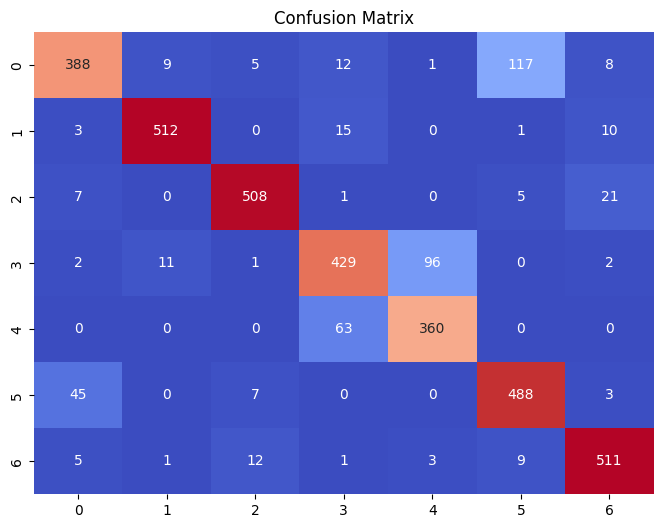

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.title('Confusion Matrix')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Weighted F1 Score:{f1:.4f}')

In [23]:
#XG Boost

Accuracy with selected features: 0.9656862745098039
[[507   0   0   5   0  28   0]
 [  1 537   0   3   0   0   0]
 [  0   0 542   0   0   0   0]
 [  1   1   0 501  38   0   0]
 [  1   0   0  19 403   0   0]
 [ 24   0   0   0   0 517   2]
 [  0   0   2   1   0   0 539]]
Weighted F1 Score:0.9657
Fold 1: Accuracy = 0.9239
Fold 2: Accuracy = 0.9103
Fold 3: Accuracy = 0.9210
Fold 4: Accuracy = 0.9373
Fold 5: Accuracy = 0.9264
Fold 6: Accuracy = 0.9482
Fold 7: Accuracy = 0.9210
Fold 8: Accuracy = 0.9346
Fold 9: Accuracy = 0.9183
Fold 10: Accuracy = 0.9264

Mean Accuracy: 0.9267


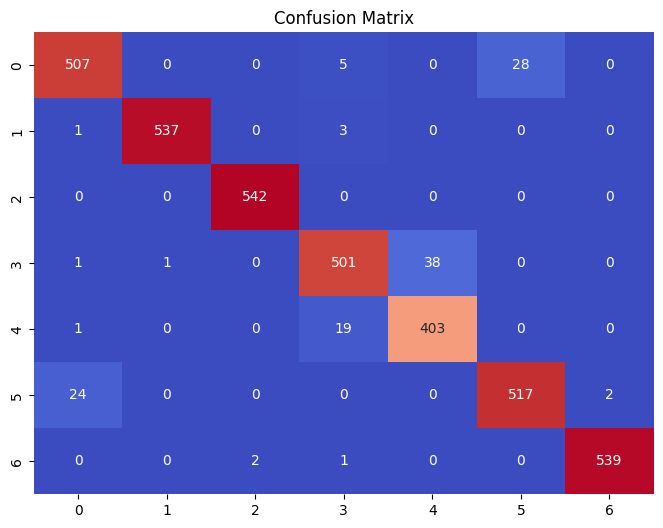

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softmax', num_class=len(set(y)), random_state=42)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)
print(confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.title('Confusion Matrix')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Weighted F1 Score:{f1:.4f}')


num_folds = 10


kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


cv_results = cross_val_score(xgb, X_test,y_test, cv=kf, scoring='accuracy')


for i, accuracy in enumerate(cv_results, 1):
    print(f"Fold {i}: Accuracy = {accuracy:.4f}")


mean_accuracy = np.mean(cv_results)
print(f"\nMean Accuracy: {mean_accuracy:.4f}")

[[348   0   0   0  94  98   0]
 [240   0   0   0 229   5  67]
 [367   0   0   0 106  68   1]
 [ 87   0   0   0 454   0   0]
 [ 10   0   0   0 413   0   0]
 [236   0   0   0   8 298   1]
 [137   0   0   0 352   3  50]]
Accuracy: 0.30201525054466233
              precision    recall  f1-score   support

           0       0.24      0.64      0.35       540
           1       0.00      0.00      0.00       541
           2       0.00      0.00      0.00       542
           3       0.00      0.00      0.00       541
           4       0.25      0.98      0.40       423
           5       0.63      0.55      0.59       543
           6       0.42      0.09      0.15       542

    accuracy                           0.30      3672
   macro avg       0.22      0.32      0.21      3672
weighted avg       0.22      0.30      0.21      3672

Weighted F1 Score:0.2070
Fold 1: Accuracy = 0.2391
Fold 2: Accuracy = 0.2826
Fold 3: Accuracy = 0.2943
Fold 4: Accuracy = 0.2480
Fold 5: Accuracy = 0.2725


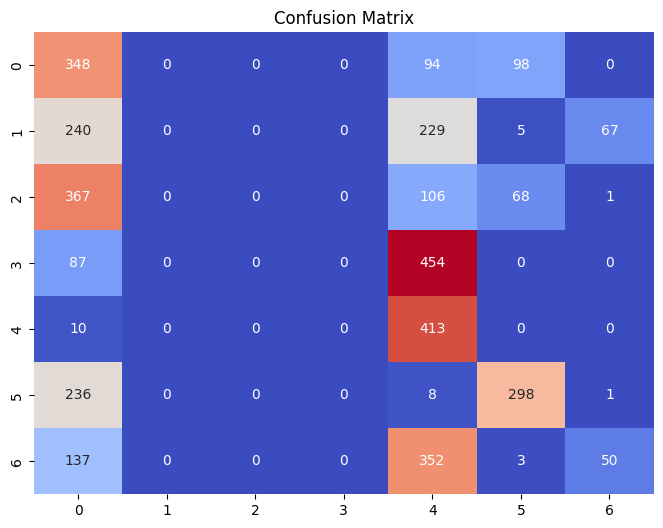

In [35]:
model= MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy}")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.title('Confusion Matrix')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Weighted F1 Score:{f1:.4f}')

num_folds = 10


kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


cv_results = cross_val_score(model, X_test,y_test, cv=kf, scoring='accuracy')


for i, accuracy in enumerate(cv_results, 1):
    print(f"Fold {i}: Accuracy = {accuracy:.4f}")


mean_accuracy = np.mean(cv_results)
print(f"\nMean Accuracy: {mean_accuracy:.4f}")


Accuracy: 0.3358
[[  0 127 213   0   7 159  34]
 [  0 261  74   0   9   4 193]
 [  0 152 214   0   4 124  48]
 [  0 175  39   0  53   6 268]
 [  0  68   2   0  77   0 276]
 [  0  25 133   0   1 380   4]
 [  0 151  35   0  52   3 301]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       540
           1       0.27      0.48      0.35       541
           2       0.30      0.39      0.34       542
           3       0.00      0.00      0.00       541
           4       0.38      0.18      0.25       423
           5       0.56      0.70      0.62       543
           6       0.27      0.56      0.36       542

    accuracy                           0.34      3672
   macro avg       0.25      0.33      0.27      3672
weighted avg       0.25      0.34      0.28      3672

Weighted F1 Score:0.2756
Fold 1: Accuracy = 0.2554
Fold 2: Accuracy = 0.2880
Fold 3: Accuracy = 0.3379
Fold 4: Accuracy = 0.3379
Fold 5: Accuracy = 0.2888
Fold 6: Accur

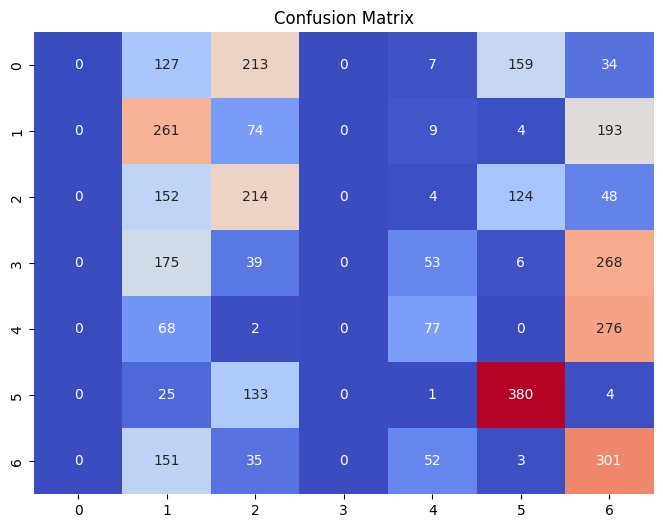

In [37]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.title('Confusion Matrix')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Weighted F1 Score:{f1:.4f}')

num_folds = 10


kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


cv_results = cross_val_score(svm_classifier, X_test,y_test, cv=kf, scoring='accuracy')


for i, accuracy in enumerate(cv_results, 1):
    print(f"Fold {i}: Accuracy = {accuracy:.4f}")


mean_accuracy = np.mean(cv_results)
print(f"\nMean Accuracy: {mean_accuracy:.4f}")

[[357   6  39  13   3 113   9]
 [ 18 482   5  15   1   3  17]
 [  6   0 476   3   0   9  48]
 [ 14  29   8 363 124   1   2]
 [  0   3   0  70 350   0   0]
 [ 67   0   8   0   0 465   3]
 [ 11   3  27   1   2  10 488]]
Accuracy: 0.8118191721132898
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       540
           1       0.92      0.89      0.91       541
           2       0.85      0.88      0.86       542
           3       0.78      0.67      0.72       541
           4       0.73      0.83      0.78       423
           5       0.77      0.86      0.81       543
           6       0.86      0.90      0.88       542

    accuracy                           0.81      3672
   macro avg       0.81      0.81      0.81      3672
weighted avg       0.81      0.81      0.81      3672

Weighted F1 Score:0.8100
Fold 1: Accuracy = 0.7500
Fold 2: Accuracy = 0.7772
Fold 3: Accuracy = 0.7902
Fold 4: Accuracy = 0.7847
Fold 5: Accuracy = 0.7820
F

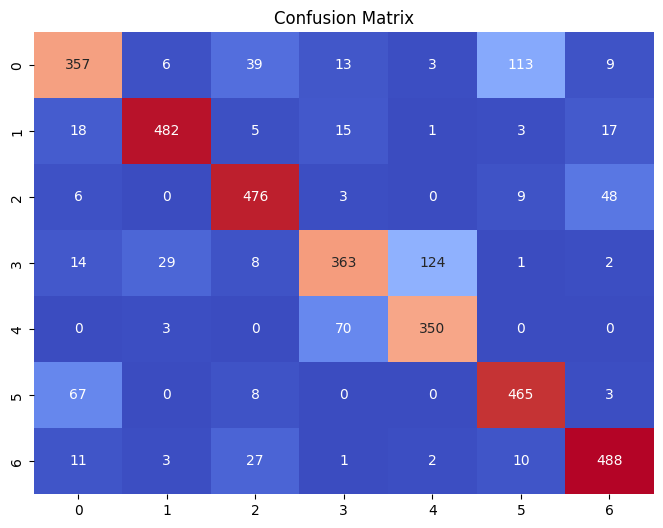

In [38]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini",max_depth=7,min_samples_split=2,min_samples_leaf=2,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy}")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.title('Confusion Matrix')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1 Score:{f1:.4f}')
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_test,y_test, cv=kf, scoring='accuracy')
for i, accuracy in enumerate(cv_results, 1):
    print(f"Fold {i}: Accuracy = {accuracy:.4f}")
mean_accuracy = np.mean(cv_results)
print(f"\nMean Accuracy: {mean_accuracy:.4f}")

[[437   2  11  13   0  69   8]
 [  1 522   0  13   2   1   2]
 [  4   0 498   7   0  12  21]
 [  8   5   2 460  64   0   2]
 [  0   1   0  69 352   0   1]
 [ 59   1   6   1   0 473   3]
 [  2   0  14   2   0   4 520]]
Accuracy: 0.8883442265795207
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       540
           1       0.98      0.96      0.97       541
           2       0.94      0.92      0.93       542
           3       0.81      0.85      0.83       541
           4       0.84      0.83      0.84       423
           5       0.85      0.87      0.86       543
           6       0.93      0.96      0.95       542

    accuracy                           0.89      3672
   macro avg       0.89      0.89      0.89      3672
weighted avg       0.89      0.89      0.89      3672

Weighted F1 Score:0.8884
Fold 1: Accuracy = 0.8016
Fold 2: Accuracy = 0.7853
Fold 3: Accuracy = 0.8665
Fold 4: Accuracy = 0.8474
Fold 5: Accuracy = 0.8501
F

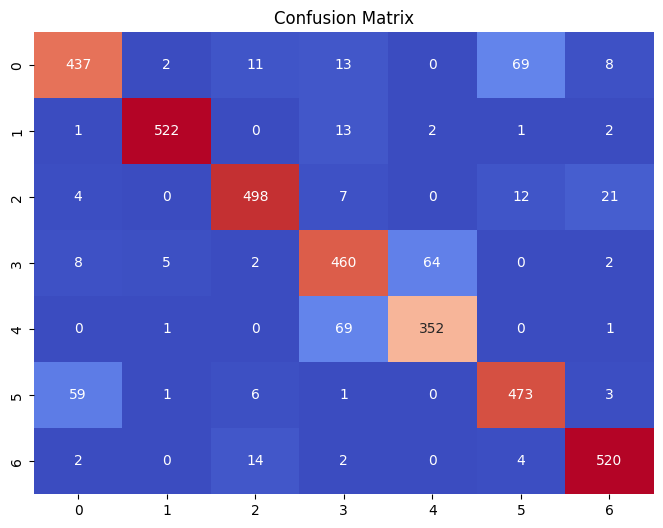

In [39]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42,n_estimators=100,min_samples_leaf=2,min_samples_split=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy}")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.title('Confusion Matrix')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1 Score:{f1:.4f}')
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_test,y_test, cv=kf, scoring='accuracy')
for i, accuracy in enumerate(cv_results, 1):
    print(f"Fold {i}: Accuracy = {accuracy:.4f}")
mean_accuracy = np.mean(cv_results)
print(f"\nMean Accuracy: {mean_accuracy:.4f}")

[[142  31  69  91   6 184  17]
 [ 15 182  47  47   9  15 226]
 [140  54  85  81   3 146  33]
 [ 28   3   5 307 164   2  32]
 [  0   0   1 129 292   0   1]
 [ 55  30  27   6   0 422   3]
 [  3 119  22  11   7   7 373]]
Accuracy: 0.4910130718954248
              precision    recall  f1-score   support

           0       0.37      0.26      0.31       540
           1       0.43      0.34      0.38       541
           2       0.33      0.16      0.21       542
           3       0.46      0.57      0.51       541
           4       0.61      0.69      0.65       423
           5       0.54      0.78      0.64       543
           6       0.54      0.69      0.61       542

    accuracy                           0.49      3672
   macro avg       0.47      0.50      0.47      3672
weighted avg       0.47      0.49      0.47      3672

Weighted F1 Score:0.4659
Fold 1: Accuracy = 0.5082
Fold 2: Accuracy = 0.4728
Fold 3: Accuracy = 0.5041
Fold 4: Accuracy = 0.4877
Fold 5: Accuracy = 0.4578
F

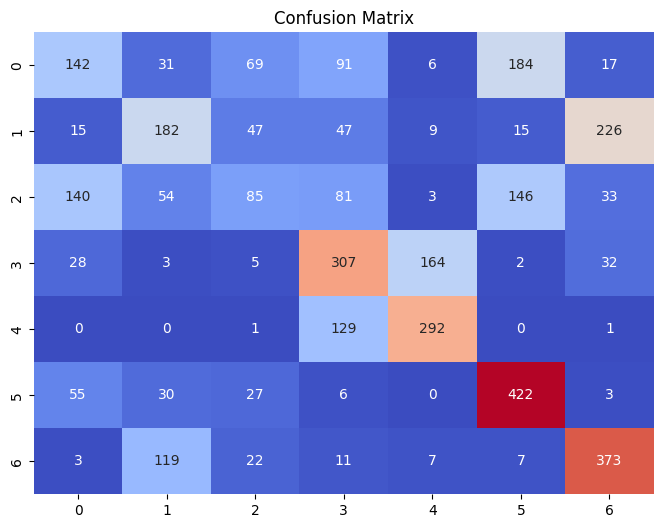

In [57]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {accuracy}")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.title('Confusion Matrix')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1 Score:{f1:.4f}')
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_test,y_test, cv=kf, scoring='accuracy')
for i, accuracy in enumerate(cv_results, 1):
    print(f"Fold {i}: Accuracy = {accuracy:.4f}")
mean_accuracy = np.mean(cv_results)
print(f"\nMean Accuracy: {mean_accuracy:.4f}")


In [40]:
!pip install mlxtend

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


sfs1 = SFS(xgb,
           k_features=12,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X_train, y_train)
print(sfs1.k_feature_idx_)
X_train_sele = sfs1.transform(X_train)
X_test_sele = sfs1.transform(X_test)

xgb.fit(X_train_sele, y_train)
print('Training accuracy:', np.mean(xgb.predict(X_train_sele) == y_train)*100)
print('Test accuracy:', np.mean(xgb.predict(X_test_sele) == y_test)*100)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
metric_dict
print(metric_dict)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.3min finished

[2023-12-10 16:03:44] Features: 1/12 -- score: 0.3906599515628052[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:  5.1min finished

[2023-12-10 16:08:50] Features: 2/12 -- score: 0.8266611317819432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:  5.8min finished

[2023-12-10 16:14:37] Features: 3/12 -- score: 0.9197304965426671[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  77 out o

(0, 1, 2, 3, 23, 37, 43, 45, 48, 52, 59, 74)
Training accuracy: 99.88425925925925
Test accuracy: 96.5958605664488
{1: {'feature_idx': (1,), 'cv_scores': array([0.38155208, 0.38767869, 0.38938053, 0.39393939, 0.40074906]), 'avg_score': 0.3906599515628052, 'feature_names': ('length',), 'ci_bound': 0.00825038918791368, 'std_dev': 0.006419083081034147, 'std_err': 0.0032095415405170736}, 2: {'feature_idx': (1, 2), 'cv_scores': array([0.82947583, 0.83117767, 0.82062628, 0.82737487, 0.824651  ]), 'avg_score': 0.8266611317819432, 'feature_names': ('length', 'width'), 'ci_bound': 0.004784708424242031, 'std_dev': 0.003722665706331395, 'std_err': 0.0018613328531656972}, 3: {'feature_idx': (0, 1, 2), 'cv_scores': array([0.91524847, 0.92035398, 0.92205582, 0.92407218, 0.91692203]), 'avg_score': 0.9197304965426671, 'feature_names': ('carat', 'length', 'width'), 'ci_bound': 0.004169661515033706, 'std_dev': 0.0032441383158023345, 'std_err': 0.001622069157901167}, 4: {'feature_idx': (0, 1, 2, 3), 'cv_s

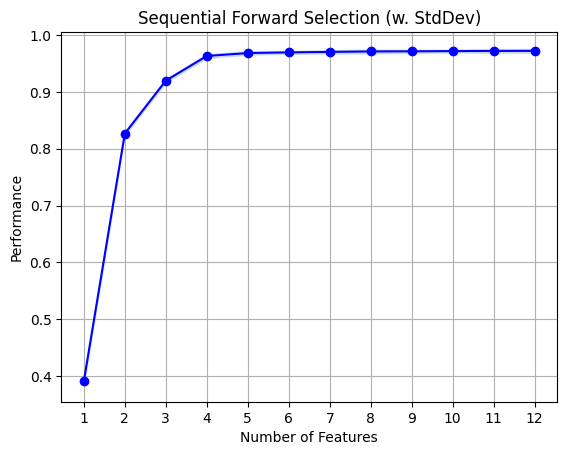

In [43]:
dat = pd.DataFrame.from_dict(metric_dict).T
dat
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [51]:
#for features=5
sfs2 = SFS(xgb,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs2 = sfs2.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.3min finished

[2023-12-10 17:24:25] Features: 1/5 -- score: 0.3906599515628052[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:  5.1min finished

[2023-12-10 17:29:32] Features: 2/5 -- score: 0.8266611317819432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:  5.8min finished

[2023-12-10 17:35:18] Features: 3/5 -- score: 0.9197304965426671[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  77 out of  

In [52]:
print(sfs2.k_feature_idx_)

(0, 1, 2, 3, 43)


In [53]:
X_train_sele = sfs2.transform(X_train)
X_test_sele = sfs2.transform(X_test)

xgb.fit(X_train_sele, y_train)
print('Training accuracy:', np.mean(xgb.predict(X_train_sele) == y_train)*100)
print('Test accuracy:', np.mean(xgb.predict(X_test_sele) == y_test)*100)


Training accuracy: 99.75490196078431
Test accuracy: 96.07843137254902


In [54]:
metric_dict = sfs2.get_metric_dict(confidence_interval=0.95)
metric_dict

{1: {'feature_idx': (1,),
  'cv_scores': array([0.38155208, 0.38767869, 0.38938053, 0.39393939, 0.40074906]),
  'avg_score': 0.3906599515628052,
  'feature_names': ('length',),
  'ci_bound': 0.00825038918791368,
  'std_dev': 0.006419083081034147,
  'std_err': 0.0032095415405170736},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([0.82947583, 0.83117767, 0.82062628, 0.82737487, 0.824651  ]),
  'avg_score': 0.8266611317819432,
  'feature_names': ('length', 'width'),
  'ci_bound': 0.004784708424242031,
  'std_dev': 0.003722665706331395,
  'std_err': 0.0018613328531656972},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.91524847, 0.92035398, 0.92205582, 0.92407218, 0.91692203]),
  'avg_score': 0.9197304965426671,
  'feature_names': ('carat', 'length', 'width'),
  'ci_bound': 0.004169661515033706,
  'std_dev': 0.0032441383158023345,
  'std_err': 0.001622069157901167},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.96051736, 0.95881552, 0.96358067, 0.96867552, 0.96424923

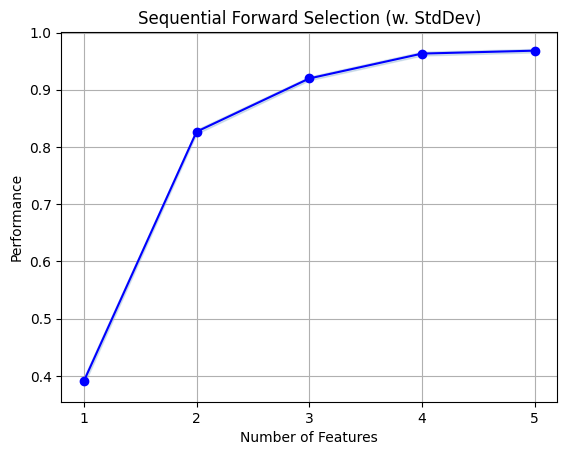

In [55]:
df = pd.DataFrame.from_dict(metric_dict).T
df



fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
# we can also use the Exhaustive Feature Selector
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs1 = EFS(xgb,
           min_features=1,
           max_features=X.shape[1],
           scoring='accuracy',
           print_progress=True,
           n_jobs=-1,
           cv=5)

efs1 = efs1.fit(X_train, y_train)
efs1.best_idx_